In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
#reading in data
stopVariability = pd.read_csv("variabilityBetweenStops.csv")
stopCoords = pd.read_csv("stopCoords.csv")

In [5]:
stopVariability = stopVariability.sort_values("StdDev", ascending = False)
topTenHighestVariable = stopVariability.head(10)
display(HTML(topTenHighestVariable.to_html()))

,Unnamed: 0,Stop1,Stop2,MeanTime,StdDev,NumJourneys
0,15030,1141.0,6282.0,1804.500000,1390.879039,2.0
1,13884,4567.0,2038.0,1147.500000,1318.385250,4.0
2,668,4533.0,2063.0,2230.000000,1265.721138,2.0
3,4350,752.0,767.0,1161.000000,1087.403904,9.0
4,5005,7020.0,7161.0,910.666667,980.163422,3.0
5,12956,4717.0,3665.0,2145.000000,948.234412,5.0
6,2138,1627.0,3671.0,1042.000000,847.113924,2.0
7,300,1358.0,5189.0,798.909091,813.204122,22.0
8,16148,5192.0,342.0,786.090909,783.263232,11.0
9,12962,2507.0,3665.0,1676.333333,768.904632,3.0


In [6]:
highVariableStops = list(set(topTenHighestVariable.Stop1.unique()) | set(topTenHighestVariable.Stop2.unique()))
highestVariableStopsCoords = stopCoords[stopCoords["StopID"].isin(highVariableStops)]
froms = stopCoords[stopCoords["StopID"].isin(topTenHighestVariable.Stop1)]
tos = stopCoords[stopCoords["StopID"].isin(topTenHighestVariable.Stop2)]
BBox = ((highestVariableStopsCoords.Long.min(), highestVariableStopsCoords.Long.max(), highestVariableStopsCoords.Lat.min(), highestVariableStopsCoords.Lat.max()))

print(BBox)
display(HTML(froms.to_html()))
display(HTML(tos.to_html()))


(-6.438187999999999, -6.137441363930884, 53.17180370950324, 53.42940100000001)


,Unnamed: 0,StopID,Long,Lat
114,114,5192.0,-6.253823,53.341977
162,162,752.0,-6.244450,53.333645
299,299,1358.0,-6.262534,53.344467
384,384,4717.0,-6.252538,53.349882
385,385,4533.0,-6.137441,53.171804
953,953,2507.0,-6.227079,53.348190
1830,1830,1627.0,-6.237783,53.408283
2102,2102,4567.0,-6.147082,53.282955
3168,3168,7020.0,-6.431097,53.394135
3547,3547,1141.0,-6.311097,53.289913


,Unnamed: 0,StopID,Long,Lat
5,5,3665.0,-6.244399,53.425388
76,76,6282.0,-6.318782,53.284033
77,77,5189.0,-6.253837,53.345971
252,252,342.0,-6.255966,53.345463
445,445,2063.0,-6.189715,53.280312
631,631,3671.0,-6.230061,53.429401
712,712,767.0,-6.219269,53.307672
1536,1536,2038.0,-6.149665,53.294043
3236,3236,7161.0,-6.438188,53.391956


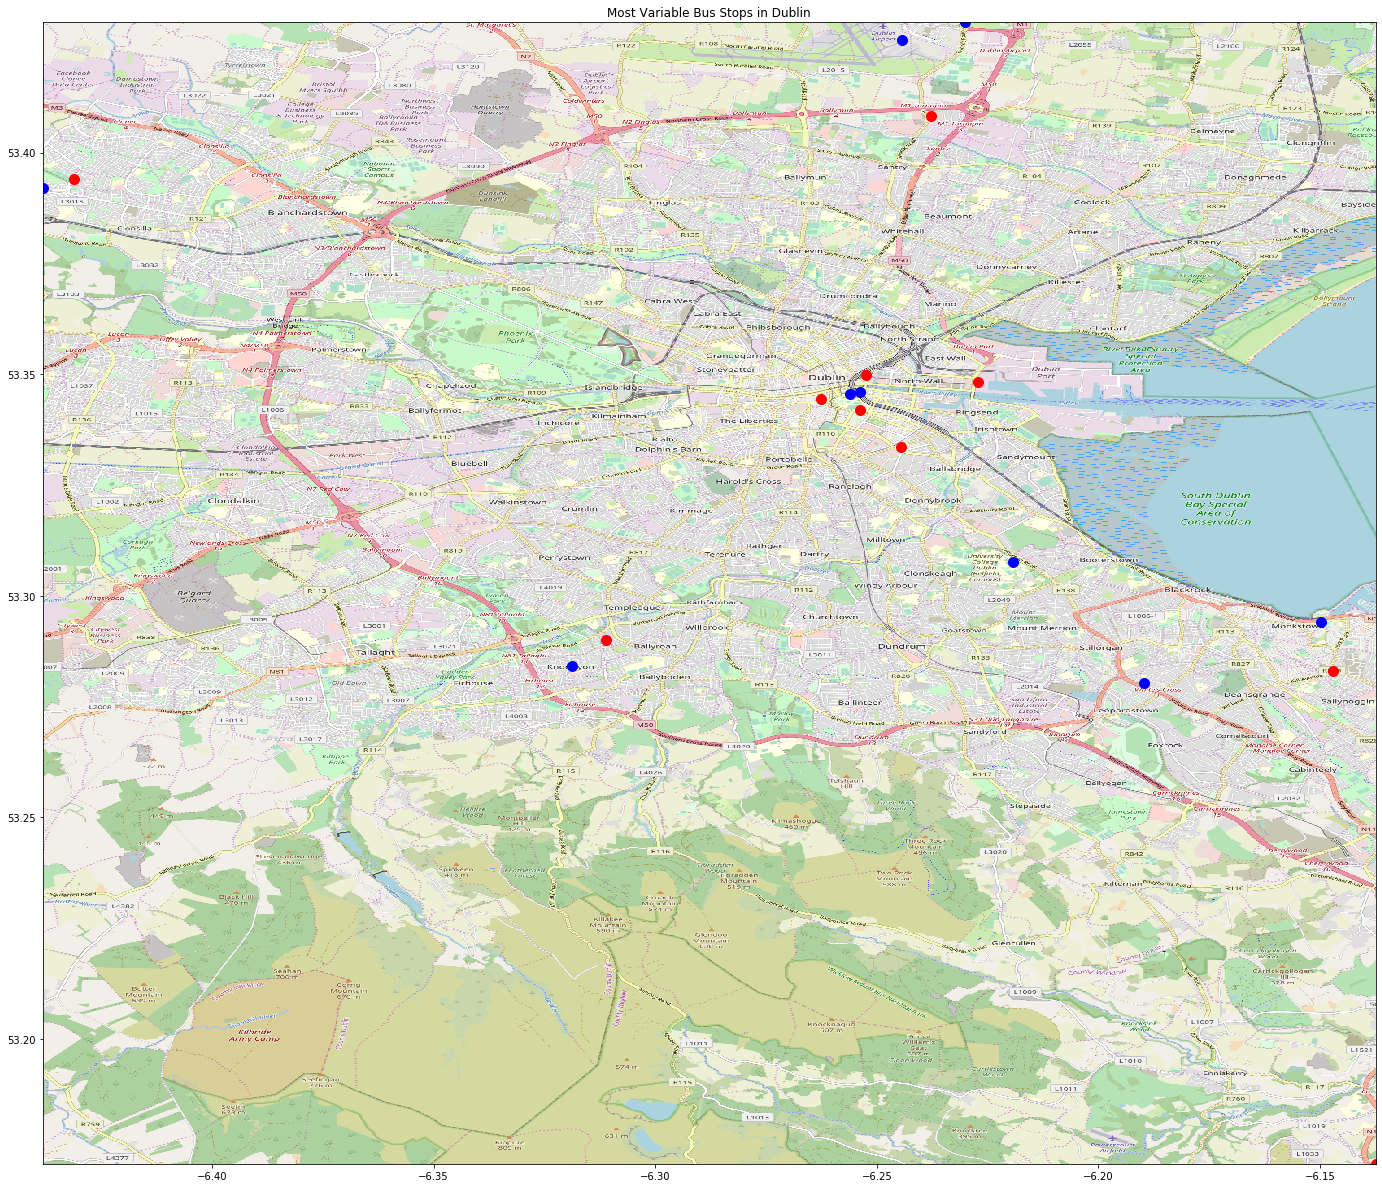

In [9]:
mapImg = plt.imread('map.png')
#drawing plot
fig, ax = plt.subplots(figsize = (24,21))
ax.scatter(froms.Long, froms.Lat, zorder=1, alpha= 1, c='r', s=100)
ax.scatter(tos.Long, tos.Lat, zorder=1, alpha= 1, c='b', s=100)
ax.set_title('Most Variable Bus Stops in Dublin')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapImg, zorder=0, extent = BBox, aspect= 'equal')